# Application Summary Jupyter Notebook

The notebook is used simplify to set user input and display charts
The files `plotting.py` and `applicants.py` are used to generate and display charts & to create a applicant catalog.

The jupyter notebook creates a dataframe of the excle file which contains the applicant data. If the application layout changes the jupyter notebook references has to get changed too.

In [1]:
# Variables
release_version="1.24"
local_excel_file="./Kubernetes 1.24 Release Team Shadow Application (Responses).xlsx"

In [2]:
# Schema variables reference column headers of the applicant excel file

# General applicant infos
schema_email = "Email Address"
schema_name = "Name"
schema_pronouns = "To help address everyone correctly, please share your pronouns if you're comfortable doing so. You can more about pronoun sharing here https://www.mypronouns.org/sharing"
schema_slack = "Slack Handle"
schema_github = "Github Handle"
schema_affiliation="Company Affiliation / Employer"
schema_previously_served = "Have you previously served on a Kubernetes Release Team?"

# Returners infos
schema_returners_previous_roles = "Which release team roles have you served in?"
schema_returners_previous_release_and_role = "Please tell us which release team(s) you were previously on and what role you held (i.e. Lead or Shadow)"
schema_returners_interested_in_roles = f"What release team roles are you interested in for {release_version}?"
schema_returners_can_volunteer_for_up_coming_cycles = "Can you volunteer for 1.25 or 1.26?"
schema_returners_timezone="What time zone are you normally in?"
schema_returners_goals="Goals"
schema_returners_contribution_plans="Contribution Plans"
schema_returners_interested_in_stable_roster="Are you interested in joining a release team stable roster"

# Newcomers
schema_newcomers_interested_in_roles = "Which release roles are you interested in?"
schema_newcomers_read_handbook = "Have you read the role handbook associated with that role?"
schema_newcomers_why_interested = "Why are you interested in that role(s)?"
schema_newcomers_handbook_questions = "Do you have other feedback or questions about the handbook?"
schema_newcomers_timestimate = "How much time do you estimate you can commit to the Release Team a week? "
schema_newcomers_attend_release_team_meetings = "Will you be able to attend Release Team meetings? "
schema_newcomers_attend_burndown_meetings = "Will you be able to attend Burndown meetings?"
schema_newcomers_scheduled_conflicts = "Do you have schedule conflicts?"
schema_newcomers_volunteer_upcoming_releases = f"{schema_returners_can_volunteer_for_up_coming_cycles}.1"
schema_newcomers_timezone=f"{schema_returners_timezone}.1"
schema_newcomers_experience_contributing = "What is your experience contributing?"
schema_newcomers_signed_cla = "Have you signed the CLA?"
schema_newcomers_k8s_org_member = "Are you a Kubernetes Org Member?"
schema_newcomers_prior_release_teams = "Prior Release Teams"
schema_newcomers_relevant_experience = "Relevant Experience"
schema_newcomers_goals = f"{schema_returners_goals}.1"
schema_newcomers_contribution_plans = f"{schema_returners_contribution_plans}.1"
schema_newcomers_comments = "Comments"
schema_newcomers_applied_previously = "Have you applied to any previous Kubernetes release teams?"


In [3]:
# Use pandas to load the local excel file and generate a dataframe
import pandas as pd
from vars import *
from plotting import *
df = pd.read_excel(local_excel_file)
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [4]:
# Filter applicants by returniung release team members and new applicants
returners = df[df[schema_previously_served].str.contains("Yes")]
newcomers = df[df[schema_previously_served].str.contains("No")]

release_teams = {
    team_bugtriage: {}, team_cisignal: {}, team_communications: {}, team_releasenotes: {}, team_documentation: {}, team_enhacements: {}
}

for team in release_teams:
    teamApplicantsReturners = returners[returners[schema_returners_interested_in_roles].str.contains(team)]
    teamApplicantsNewcomers = newcomers[newcomers[schema_newcomers_interested_in_roles].str.contains(team)]
    release_teams[team] = {
        group_returners: teamApplicantsReturners,
        group_newcomers: teamApplicantsNewcomers
    }


In [5]:
timezone_aliases={
        "gmt": "london gmt+0", "paris": "london gmt+0", "london": "london gmt+0",
        "middle europe": "central europe gmt+1", "cet": "central europe gmt+1", "+ 1": "central europe gmt+1", "central time": "central europe gmt+1", "central european time": "central europe gmt+1", "berlin": "central europe gmt+1", "+1": "central europe gmt+1", 
        "ist": "india gmt+5", "+5": "india gmt+5", "+ 5": "india gmt+5", "india": "india gmt+5", "indian": "india gmt+5", "+ 6": "india gmt+5",
        "pst": "us pacific gmt-8", "pdt": "us pacific gmt-8", "pacific": "us pacific gmt-8", "pacific time": "us pacific gmt-8",
        "edt": "us east gmt-5", "eastern time": "us east gmt-5", "us east": "us east gmt-5", "est": "us east gmt-5",
        "+4": "iran gmt+4",
        "+2": "east europe gmt+2", "eastern europe": "east europe gmt+2", "eastern standard time": "east europe gmt+2",
        "+3": "arabia gmt+3",
        "+9": "japan gmt+9", "jst": "japan gmt+9",
        "+8": "china gmt+8", "shanghai": "china gmt+8",
        "utc": "london gmt+0"
    }


Timezone of applicants with a threshold of 1


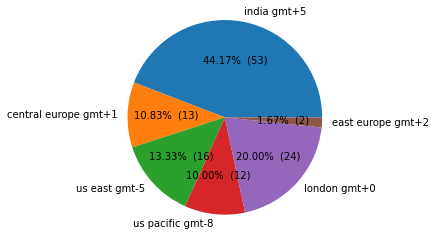

see timezones: https://24timezones.com/timezone-map

Affiliation of applicants with a threshold of 1


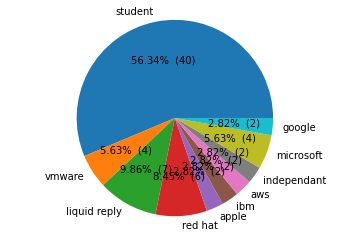

SIG-Release applicants by team
Total applicants: 125, which applied to one or multiple teams


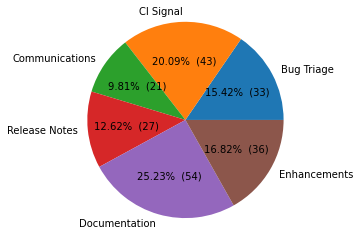

Pronouns 


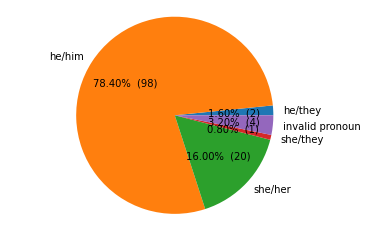

NameError: name 'schema_applied_previously' is not defined

In [6]:
# Some general plotting

# General sig release wide charts
filter_entities(newcomers[schema_newcomers_timezone].tolist() + returners[schema_returners_timezone].tolist(), "Timezone", 
    aliases=timezone_aliases,
    threshold=1, unreached_threshold_print=False)
print(f"see timezones: https://24timezones.com/timezone-map")
filter_entities(df[schema_affiliation].tolist(), "Affiliation", 
    keywords=["student", "liquid reply", "vmware", "microsoft", "red hat", "institute", "cisco", "ibm", "apple", "suse", "google", "independant", "deloitte", "adesso"],
    aliases={"redhat": "red hat", "freelancer": "independant"},
    threshold=1)
applicants_by_team(len(df), release_teams)
pronouns_chart(df[schema_pronouns])
reapplying_newcomers(newcomers[schema_applied_previously])
newcomers_and_returners(returners, newcomers)


In [ ]:
# Team specific charts

# Generate plots for all teams
for team in release_teams:
    print(f"\n\n{team}")
    newcomers_and_returners(release_teams[team][group_returners], release_teams[team][group_newcomers], team)
    applied_for_multiple_teams([release_teams[team][group_newcomers][schema_newcomers_interested_in_roles], release_teams[team][group_returners][schema_returners_interested_in_roles]], team, release_teams)
    pronouns_chart(release_teams[team][group_newcomers][schema_pronouns].tolist() + release_teams[team][group_returners][schema_pronouns].tolist(), team)
    filter_entities(release_teams[team][group_newcomers][schema_newcomers_timezone].tolist() + release_teams[team][group_returners][schema_returners_timezone].tolist(), "Timezone", 
        aliases=timezone_aliases,
        threshold=1, unreached_threshold_print=False, team=team)

In [8]:
# Create applicant markdown files
from applicants import *

# method used to write returner applications to a markdown file
def returner_applications(team):
    team_returning_applicants = []
    indexs = release_teams[team][group_returners].index
    returners = release_teams[team][group_returners]
    for i in indexs:
        ag = GeneralInfo(returners[schema_email][i],
                        returners[schema_name][i],
                        returners[schema_pronouns][i],
                        returners[schema_slack][i],
                        returners[schema_github][i],
                        returners[schema_affiliation][i])
        ai = ReturnerInfo(ag,
                        returners[schema_returners_previous_roles][i],
                        returners[schema_returners_previous_release_and_role][i],
                        returners[schema_returners_interested_in_roles][i],
                        returners[schema_returners_timezone][i],
                        returners[schema_returners_can_volunteer_for_up_coming_cycles][i],
                        returners[schema_returners_goals][i],
                        returners[schema_returners_contribution_plans][i],
                        returners[schema_returners_interested_in_stable_roster][i])
        team_returning_applicants.append(ai)
    write_returner_applications_to_file(team, team_returning_applicants)

# method used to write newcomer applications to a markdown file
def newcomer_applications(team):
    team_newcomer_applicants = []
    indexs = release_teams[team][group_newcomers].index
    nc = release_teams[team][group_newcomers]
    for i in indexs:
        ag = GeneralInfo(nc[schema_email][i],
                        nc[schema_name][i],
                        nc[schema_pronouns][i],
                        nc[schema_slack][i],
                        nc[schema_github][i],
                        nc[schema_affiliation][i])
        ai = NewcomerInfo(general_info=ag,
                        interested_roles=nc[schema_newcomers_interested_in_roles][i],
                        read_role_handbook=nc[schema_newcomers_read_handbook][i],
                        why_interested=nc[schema_newcomers_why_interested][i],
                        feedback_handbook=nc[schema_newcomers_handbook_questions][i],
                        timeestimate_commit_to_releaseteam=nc[schema_newcomers_timestimate][i],
                        able_to_attend_release_team_meetings=nc[schema_newcomers_attend_release_team_meetings][i],
                        able_to_attend_burndown_meetings=nc[schema_newcomers_attend_burndown_meetings][i],
                        scheduled_conflicts=nc[schema_newcomers_scheduled_conflicts][i],
                        volunteer_for_upcoming_cycles=nc[schema_newcomers_volunteer_upcoming_releases][i],
                        timezone=nc[schema_newcomers_timezone][i],
                        experience_contributing=nc[schema_newcomers_experience_contributing][i],
                        signed_cla=nc[schema_newcomers_signed_cla][i],
                        k8s_org_member=nc[schema_newcomers_k8s_org_member][i],
                        prior_release_teams=nc[schema_newcomers_prior_release_teams][i],
                        relevant_experience=nc[schema_newcomers_relevant_experience][i],
                        goals=nc[schema_newcomers_goals][i],
                        contribution_plans=nc[schema_newcomers_contribution_plans][i],
                        comments=nc[schema_newcomers_comments][i],
                        applied_previously=nc[schema_newcomers_applied_previously][i])
        team_newcomer_applicants.append(ai)
    write_newcomer_applications_to_file(team, team_newcomer_applicants)

returner_applications(team_cisignal)
newcomer_applications(team_cisignal)


KeyError: 'How much time do you estimate you can commit to the Release Team a week?'